In [31]:
#in this model we predict that the patient having these feature should need to diagnose or no

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('heart_data.csv')
df.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,extreme,0,67,no,142,no angina,female,0,223,0.3,0,2,no
1,120,high,0,50,no,158,no angina,female,1,219,1.6,0,0,no
2,126,extreme,2,35,no,156,angina,male,0,282,0.0,2,0,yes
3,150,extreme,2,63,no,154,no angina,female,1,407,4.0,2,3,yes
4,140,extreme,2,46,no,120,angina,male,1,311,1.8,0,2,yes


In [3]:
df.shape

(297, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_bp          297 non-null    int64  
 1   chest_pain       297 non-null    object 
 2   thalassemia      297 non-null    int64  
 3   age              297 non-null    int64  
 4   fasting_bs       297 non-null    object 
 5   max_hr           297 non-null    int64  
 6   exercise_angina  297 non-null    object 
 7   gender           297 non-null    object 
 8   st_slope         297 non-null    int64  
 9   cholesterol      297 non-null    int64  
 10  st_depression    297 non-null    float64
 11  rest_ecg         297 non-null    int64  
 12  num_vessels      297 non-null    int64  
 13  diagnosis        297 non-null    object 
dtypes: float64(1), int64(8), object(5)
memory usage: 32.6+ KB


In [5]:
df.isnull().sum()

rest_bp            0
chest_pain         0
thalassemia        0
age                0
fasting_bs         0
max_hr             0
exercise_angina    0
gender             0
st_slope           0
cholesterol        0
st_depression      0
rest_ecg           0
num_vessels        0
diagnosis          0
dtype: int64

In [6]:
df.columns

Index(['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg', 'num_vessels', 'diagnosis'],
      dtype='object')

<Axes: >

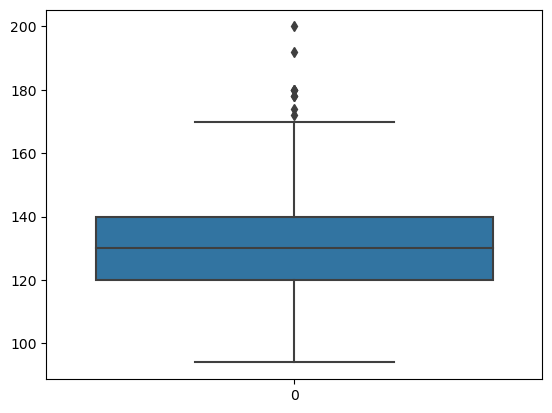

In [7]:

sns.boxplot(df['rest_bp'])

In [8]:
#df['rest_bp'].max()

df['rest_bp'].unique()#the outliers in the above fig comes above 180 are genuine so we should ignore it

array([106, 120, 126, 150, 140, 110, 130, 136, 170, 172, 112, 128, 160,
       132, 180, 148, 192, 152, 174, 105, 122, 145, 146, 125, 118, 104,
        94, 134, 124, 138, 178, 135, 101, 142, 144, 100, 129, 164, 117,
       102, 156, 108, 154, 158, 123, 200, 115, 155, 114, 165], dtype=int64)

<Axes: >

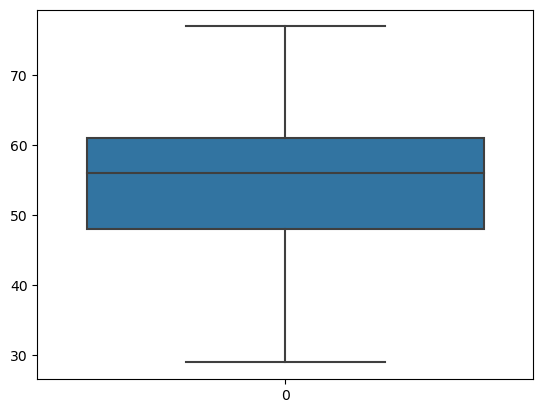

In [9]:
sns.boxplot(df['age'])

<Axes: >

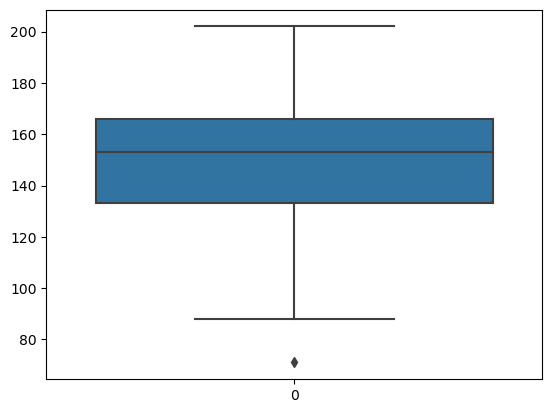

In [10]:
sns.boxplot(df['max_hr'])

<Axes: >

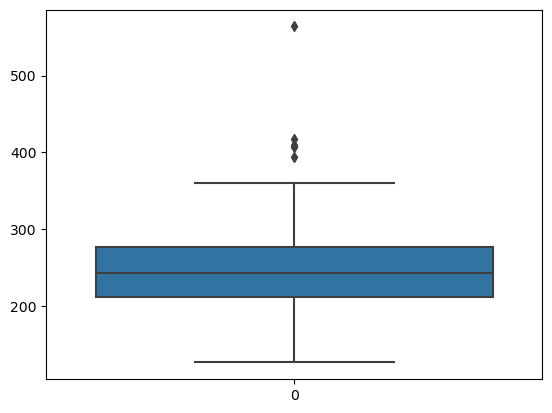

In [11]:
sns.boxplot(df['cholesterol'])

In [12]:
df['cholesterol'].max()
#df['cholesterol'].unique()#the outliers in the above fig comes above 350 are genuine so we should ignore it

564

In [13]:
df['rest_ecg'].unique()
#so here 0 belongs to normal
#        0 belongs to bad
#        0 belongs to v.bad

array([0, 2, 1], dtype=int64)

In [14]:
df.describe()

,rest_bp,thalassemia,age,max_hr,st_slope,cholesterol,st_depression,rest_ecg,num_vessels
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,131.693603,0.835017,54.542088,149.599327,0.602694,247.350168,1.055556,0.996633,0.676768
std,17.762806,0.956690,9.049736,22.941562,0.618187,51.997583,1.166123,0.994914,0.938965
min,94.000000,0.000000,29.000000,71.000000,0.000000,126.000000,0.000000,0.000000,0.000000
25%,120.000000,0.000000,48.000000,133.000000,0.000000,211.000000,0.000000,0.000000,0.000000
50%,130.000000,0.000000,56.000000,153.000000,1.000000,243.000000,0.800000,1.000000,0.000000
75%,140.000000,2.000000,61.000000,166.000000,1.000000,276.000000,1.600000,2.000000,1.000000
max,200.000000,2.000000,77.000000,202.000000,2.000000,564.000000,6.200000,2.000000,3.000000


In [15]:
df.columns

Index(['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg', 'num_vessels', 'diagnosis'],
      dtype='object')

In [16]:
#here we handle the catogorical features as
df['chest_pain']=pd.factorize(df['chest_pain'])[0]
df['fasting_bs']=pd.factorize(df['fasting_bs'])[0]
df['diagnosis']=pd.factorize(df['diagnosis'])[0]
df['exercise_angina']=pd.factorize(df['exercise_angina'])[0]
df['gender']=pd.factorize(df['gender'])[0]

df.sample(10)



,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
225,124,0,2,48,0,166,0,1,1,274,0.5,2,0,1
98,150,0,2,58,0,111,1,1,0,270,0.8,2,0,1
15,120,0,2,67,0,129,1,1,1,229,2.6,2,2,1
151,108,0,2,52,1,147,0,1,0,233,0.1,0,3,0
192,110,2,0,41,0,153,0,1,0,235,0.0,0,0,0
49,120,1,0,51,0,157,0,0,0,295,0.6,2,0,0
293,100,0,0,58,0,122,0,0,1,248,1.0,2,0,0
294,138,0,0,59,0,182,0,1,0,271,0.0,2,0,0
139,117,0,2,60,1,160,1,1,0,230,1.4,0,2,1
149,125,0,0,77,0,162,1,1,0,304,0.0,2,3,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_bp          297 non-null    int64  
 1   chest_pain       297 non-null    int64  
 2   thalassemia      297 non-null    int64  
 3   age              297 non-null    int64  
 4   fasting_bs       297 non-null    int64  
 5   max_hr           297 non-null    int64  
 6   exercise_angina  297 non-null    int64  
 7   gender           297 non-null    int64  
 8   st_slope         297 non-null    int64  
 9   cholesterol      297 non-null    int64  
 10  st_depression    297 non-null    float64
 11  rest_ecg         297 non-null    int64  
 12  num_vessels      297 non-null    int64  
 13  diagnosis        297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [18]:
df.columns

Index(['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg', 'num_vessels', 'diagnosis'],
      dtype='object')

In [19]:
del df['thalassemia']
del df['num_vessels']
df.columns

Index(['rest_bp', 'chest_pain', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg', 'diagnosis'],
      dtype='object')

In [20]:
x=df[['rest_bp', 'chest_pain', 'age', 'fasting_bs', 'max_hr',
       'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression',
       'rest_ecg']]
y=df[['diagnosis']]
y

,diagnosis
0,0
1,0
2,1
3,1
4,1
...,...
292,1
293,0
294,0
295,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30)


In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [24]:
lr.fit(train_x,train_y)

C:\Users\Sajjad PC\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sajjad PC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
f=lr.predict(test_x)

In [26]:
f[:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [27]:
test_y

,diagnosis
139,1
7,0
62,1
87,1
259,0
...,...
135,1
53,0
182,0
141,1


In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(test_y,f)

0.2

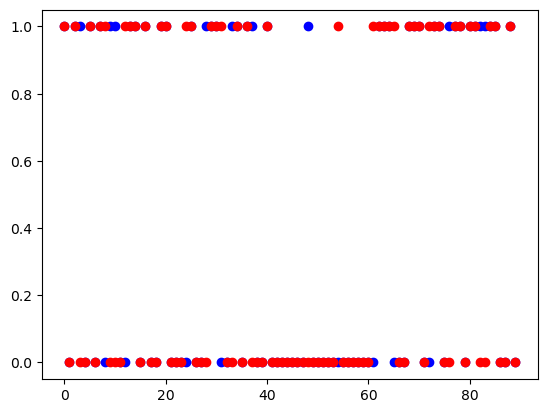

In [30]:
plt.scatter(range(len(test_y)),test_y,color='blue')
plt.scatter(range(len(f)),f,color='red')
plt.show()